# The Deutsch Algorithm 

### **Victor Onofre**

The problem solved by the Deutsch algorithm is the following. We are given a device that computes some function $f: \{0,1 \} \rightarrow \{0,1\}$. We can think of the device as a black box or "oracle".This means that we can apply the circuit to obtain values of $f(x)$ for given inputs $x$, but we cannot gain any information about the inner workings of the circuit to learn about the function $f$. There are 4 possible funcions from $\{0,1 \}$ to $\{0,1\}$, $f_{0}$, $f_{1}$, $f_{2}$ and $f_{3}$.

**$f(x)$ is constant $\Big( f_{i}(0) = f_{i}(1) \Big)$ or balanced $\Big(  f_{i}(0) \neq f_{i}(1) \Big) $?**

| Function $f_{i}(x)$  &nbsp; &nbsp; &nbsp; |  $x = 0$       &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     | $x =1$    &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;               | $f_{i}(0) \oplus    f_{i}(1)$     &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;        |
|:------------------------:|:--------------------:|:----------------------:|:----------------------------------------------:|
|          $f_{0}$         |           0          |            0           |                        0                       |
|          $f_{1}$         |           0          |            1           |                        1                       |
|          $f_{2}$         |           1          |            0           |                        1                       |
|          $f_{3}$         |           1          |            1           |                        0                       ||

The problem is to determine the value of $f_{i}(0) \oplus  f_{i}(1)$. If we determine that $f(0) \oplus f(1) = 0$, then we known that $f$ is constant $\Big( f(0) = f(1) \Big) $. If  $f(0) \oplus f(1) = 1$  then we known that $f$ is balanced $\Big(  f(0) \neq f(1) \Big) $. In particular $f_{0}$ and $f_{3}$ are constant and $f_{1}$ and $f_{2}$ are balanced.

Classically, **two** evaluations or query of the function are necessary to answer the question. If only one evaluation is permitted, the function could still be either constant or balanced regardless of the input and output obtained.

The Deutsch algorithm is a quantum algorithm capable of determining the value of $f_{i}(0) \oplus  f_{i}(1)$ by making only a single query to a quantum oracle for $f$.

The oracle can be expressed as a unitary operator

$$ U_{f} |  x>_{A}  | y >_{B} =  |  x >_{A} | y \oplus f(x) >_{B} $$

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib

The QasmSimulator backend is designed to mimic an actual device. It executes a Qiskit QuantumCircuit and returns a count dictionary containing the final values of any classical registers in the circuit.

In [2]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

In [3]:
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits

In [4]:
qreg1 = QuantumRegister(2) # The quantum register of the qubits, in this case 2 qubits
register1 = ClassicalRegister(1) 

qc = QuantumCircuit(qreg1, register1)

## Initial state

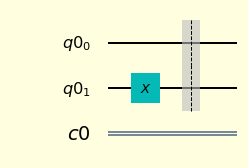

In [5]:
#qc.x(0)
qc.x(1)
qc.barrier()
qc.draw(output='mpl', style=style) 

The initial stae is $ | 0 > |0>$, we apply the $x$ gate to the second qubit and obtain $ | \psi_{0} > =  | 0 > | 1 >$

$$ | \psi_{0} >_{AB} =  | 0  >_{A} X | 0  >_{B}=  | 0  >_{A} | 1 >_{B} $$

## Apply Hadamard gates

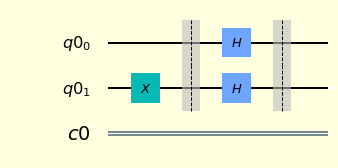

In [6]:
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw(output='mpl', style=style) 

After the Hadamard gate is apply to $| \psi_{0}>_{AB}$, the state becomes

$$ | \psi_{1} >_{AB} = (H \otimes H) | \psi_{0}>_{AB} = H | 0 >_{A} H | 1 >_{B}= \Big( \frac{1}{\sqrt{2}} | 0 >_{A} + \frac{1}{\sqrt{2}} | 1 >_{A} \Big) \Big( \frac{1}{\sqrt{2}} | 0 >_{B}  - \frac{1}{\sqrt{2}} | 1 >_{B} \Big)$$

$$ =  \frac{1}{2} | 0 >_{A} \Big(   | 0 >_{B} -  | 1 >_{B} \Big)  +  \frac{1}{2} | 1 >_{A} \Big(  | 0 >_{B} -  | 1 >_{B} \Big)  $$

## Oracle $U_{f}$

Applying the $U_{f}$ oracle, we have the state:

$$ | \psi_{2} >_{AB}  = U_{f} | \psi_{1} >_{AB}  =  \frac{1}{2} | 0 >_{A}  \Big(  | 0 \oplus f(0) >_{B} -  | 1 \oplus f(0) >_{B} \Big)  +  \frac{1}{2} | 1 >_{A}  \Big( | 0 \oplus f(1)>_{B} -  | 1 \oplus f(1) >_{B} \Big)  $$

Using $ | 0 \oplus a > -  | 1 \oplus a > = (-1)^{a} (|  0 > - | 1 > ) $

$$  | \psi_{2}>_{AB}  =  \frac{1}{2} (-1)^{f(0)} | 0 >_{A}  \Big( | 0 >_{B} - | 1 >_{B} \Big)  +  \frac{1}{2} (-1)^{f(1)} | 1 >_{A} \Big( | 0 >_{B} -  |1 >_{B} \Big)  =  \Big( \frac{1}{\sqrt{2}} (-1)^{f(0)} | 0 >_{A}  +   \frac{1}{\sqrt{2}} (-1)^{f(1)} | 1 >_{A}  \Big)  \Big( \frac{1}{\sqrt{2}} | 0 >_{B} - \frac{1}{\sqrt{2}} | 1 >_{B} \Big)  $$


$$  =  (-1)^{f(0)} \Big( \frac{1}{\sqrt{2}}  | 0 >_{A}  +   \frac{1}{\sqrt{2}} (-1)^{f(0) \oplus f(1)} | 1 >_{A}  \Big)  \Big( \frac{1}{\sqrt{2}} | 0 >_{B} - \frac{1}{\sqrt{2}}| 1 >_{B} \Big)  $$

## Function f(x) constant

If $U_{f}$ is constant $f(0) \oplus f(1) = 0$ then

$$ | \psi_{2} >_{AB}  =  (-1)^{f(0)} \Big( \frac{1}{\sqrt{2}}  | 0 >_{A}  +   \frac{1}{\sqrt{2}} (-1)^{0} | 1 >_{A}  \Big) \Big( \frac{1}{\sqrt{2}}| 0 >_{B} - \frac{1}{\sqrt{2}}| 1 >_{B} \Big)  =  (-1)^{f(0)} \Big( \frac{1}{\sqrt{2}}  | 0 >_{A}  +   \frac{1}{\sqrt{2}} | 1 >_{A}  \Big) \Big( \frac{1}{\sqrt{2}}| 0 >_{B} - \frac{1}{\sqrt{2}}| 1 >_{B} \Big)  $$

Applying the Hadamard gate to the first ($A$) qubit 

$$  | \psi_{3} >_{AB} =  (-1)^{f(0)} \Big( \frac{1}{\sqrt{2}}  H | 0 >_{A}  +   \frac{1}{\sqrt{2}} H | 1 >_{A}  \Big) \Big( \frac{1}{\sqrt{2}} | 0 >_{B} - \frac{1}{\sqrt{2}} | 1 >_{B} \Big)  $$

$$  =  (-1)^{f(0)} \Big[ \frac{1}{\sqrt{2}} \Big(  \frac{1}{\sqrt{2}} | 0 >_{A} + \frac{1}{\sqrt{2}}| 1 >_{A} \Big)  +   \frac{1}{\sqrt{2}} \Big( \frac{1}{\sqrt{2}} | 0>_{A} - \frac{1}{\sqrt{2}} | 1>_{A} \Big)  \Big] \Big( \frac{1}{\sqrt{2}}| 0 >_{B} - \frac{1}{\sqrt{2}} | 1 >_{B} \Big)  $$

$$  =  (-1)^{f(0)} \Big[  \Big(  \frac{1}{2} |  0 >_{A} + \frac{1}{2} | 1 >_{A} \Big)  +  \Big( \frac{1}{2} |  0 >_{A} - \frac{1}{2} |  1 >_{A} \Big)  \Big] \Big( \frac{1}{\sqrt{2}} |  0 >_{B} - \frac{1}{\sqrt{2}} | 1 >_{B} \Big)  $$

$$  =  (-1)^{f(0)} |  0 >_{A} \Big( \frac{1}{\sqrt{2}} |  0>_{B} - \frac{1}{\sqrt{2}} |  1>_{B} \Big)  $$

The probability of measure $| 0  >_{A}$ in the first qubit is 1. This means that for a **constant** function, a measurement of the first qubit is certain to return $| 0  >$

## Function f(x) balanced

If $U_{f}$ is balance $f(0) \oplus f(1) = 1$ then

$$ | \psi_{2}>_{AB}  =  (-1)^{f(0)} \Big( \frac{1}{\sqrt{2}}  | 0 >_{A}  +   \frac{1}{\sqrt{2}} (-1)^{1} | 1 >_{A}  \Big) \Big( \frac{1}{\sqrt{2}}| 0 >_{B} - \frac{1}{\sqrt{2}}| 1 >_{B} \Big) $$

$$  =  (-1)^{f(0)} \Big( \frac{1}{\sqrt{2}} | 0 >_{A}  -  \frac{1}{\sqrt{2}} | 1 >_{A}   \Big) \Big( \frac{1}{\sqrt{2}}| 0 >_{B}  - \frac{1}{\sqrt{2}}| 1 >_{B}  \Big)  $$

Apply the Hadamard gate to the first ($A$) qubit

$$  | \psi_{3}>_{AB}  =  (-1)^{f(0)} \Big( \frac{1}{\sqrt{2}}  H |  0 >_{A}  -   \frac{1}{\sqrt{2}} H | 1 >_{A}  \Big) \Big( \frac{1}{\sqrt{2}} |  0 >_{B} - \frac{1}{\sqrt{2}} |  1 >_{B} \Big)  $$

$$  =  (-1)^{f(0)} \Big[ \frac{1}{\sqrt{2}} \Big(  \frac{1}{\sqrt{2}}|  0 >_{A} + \frac{1}{\sqrt{2}}|  1 >_{A} \Big)  -  \frac{1}{\sqrt{2}} \Big( \frac{1}{\sqrt{2}}|  0 >_{A} - \frac{1}{\sqrt{2}} |  1 >_{A} \Big)  \Big] \Big( \frac{1}{\sqrt{2}}|  0 >_{B} - \frac{1}{\sqrt{2}}|  1 >_{B} \Big)  $$

$$  =  (-1)^{f(0)} \Big[  \Big(  \frac{1}{2} | 0 >_{A} + \frac{1}{2} | 1 >_{A} \Big)  -  \Big( \frac{1}{2} | 0 >_{A} - \frac{1}{2} | 1 >_{A} \Big)  \Big] \Big( \frac{1}{\sqrt{2}} | 0 >_{B} - \frac{1}{\sqrt{2}} | 1 >_{B} \Big)  $$

$$  =  (-1)^{f(0)} | 1 >_{A} \Big( \frac{1}{\sqrt{2}}| 0 >_{B} - \frac{1}{\sqrt{2}} | 1 >_{B} \Big)  $$

The probability of measure $| 1  >_{A}$ in the first qubit is 1. This means that for a **balanced** function, a measurement of the first qubit is certain to return $| 1  >$

## Implemented a balanced oracle (CNOT)

In this case, we can implement the CNOT gate as a balanced oracle. 

$$U_{f} | 0 0 > =  CNOT | 0 0 > = | 0 0 >  $$

$$U_{f} | 0 1 > =  CNOT | 0 1> = | 0 1 >  $$

$$U_{f} | 1 0 > =  CNOT |  1 0 > = | 1 1 >  $$

$$U_{f} | 1 1 > =  CNOT | 1 1 > = | 1 0 >  $$

The initial state can be described as:

$$ | \psi_{1} >_{AB} = (H \otimes H) | \psi_{0} >_{AB} = H | 0 >_{A} H | 1 >_{B}= \Big( \frac{1}{\sqrt{2}} | 0 >_{A} + \frac{1}{\sqrt{2}} | 1 >_{A} \Big) \Big( \frac{1}{\sqrt{2}} | 0 >_{B}  - \frac{1}{\sqrt{2}} | 1 >_{B} \Big) =  | + >_{A}   | ->_{B}  =  |+ ->_{AB} $$

where 

$$ | + >  =  \frac{1}{\sqrt{2}} | 0 > + \frac{1}{\sqrt{2}} |1 >  $$

$$ | - >  =  \frac{1}{\sqrt{2}} | 0 > - \frac{1}{\sqrt{2}} | 1 >  $$

$$ | \psi_{1} >_{AB} =  \frac{1}{2} | 0 >_{A} \Big(   | 0 >_{B} -  | 1 >_{B} \Big)  +  \frac{1}{2} | 1 >_{A} \Big(  | 0 >_{B} -  | 1 >_{B} \Big)  $$

$$ | \psi_{1} >_{AB} =  \frac{1}{2} \Big(  | 0 0 > - | 0 1 > + | 1 0 > - | 1 1 > \Big)  $$

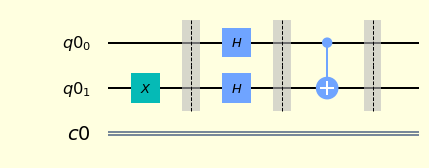

In [7]:
qc.cx(0,1)
qc.barrier()
qc.draw(output='mpl', style=style) 

$$  | \psi_{2} >_{AB}  = CNOT | \psi_{1} >_{AB} =  \frac{1}{2} \Big(  | 0 0 > - | 0 1> + | 1 1 > - | 1 0 > \Big)= | -  >_{A} | - >_{B}    = | - - >_{AB}   $$

## Apply the Hadamard gate to the first ($A$) qubit

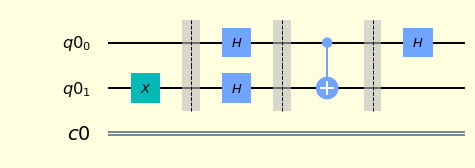

In [8]:
qc.h(0)
qc.draw(output='mpl', style=style) 

$$  | \psi_{3} >_{AB}  = (H \otimes I ) | \psi_{2} >_{AB} =   (H| -  >_{A}) | - >_{B}   = | 1  >_{A} | - >_{B}   $$

The probability of measure $| 1  >_{A}$ in the first qubit is 1. Confirming that CNOT is a balacend oracle.

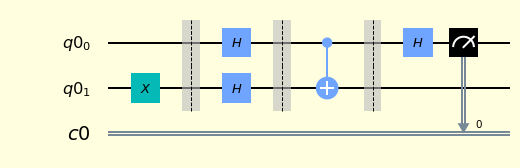

In [9]:
qc.measure(qreg1[0],register1)
qc.draw(output='mpl', style=style) 

## Execute and get counts

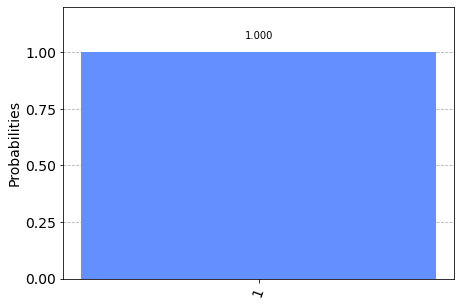

In [10]:
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

As expected we obtain $1$ with probability 1

## Putting all together in a function

Balanced oracle 1 : CNOT

In [11]:
def oracleBalance1(qcir):
    qcir.cx(0,1)
    qcir.barrier()
    
    return qcir  

Balanced oracle 2 : CNOT ($I \otimes x$)

In [12]:
def oracleBalance2(qcir):
    qcir.x(1)
    qcir.cx(0,1)
    qcir.barrier()
    
    return qcir  

Constant oracle 1: ($I \otimes x$)

In [13]:
def oracleConstant1(qcir):
    
    qcir.x(1)
    qcir.barrier()
    
    return qcir  

Constant oracle 2: ($I \otimes I$)

In [14]:
def oracleConstant2(qcir):
    
    qcir.barrier()
    
    return qcir  

Function to determine if a oracle is constant of balanced

In [15]:
def deutsch(oracle):
    
    Qreg = QuantumRegister(2)
    Creg = ClassicalRegister(1) 
    qcirc = QuantumCircuit(Qreg, Creg)
    
    qcirc.x(1)
    
    qcirc.h(0)
    qcirc.h(1)
    qcirc.barrier()
    
    qcirc = oracle(qcirc)
    
    qcirc.h(0)
    qcirc.barrier()
    
    qcirc.measure(Qreg[0],Creg)
   
    return qcirc

**Balanced oracle 1**

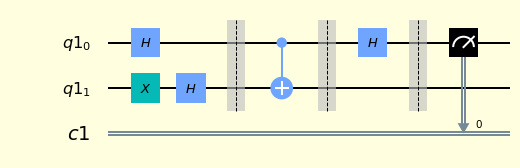

In [16]:
resultBalanced1 = deutsch(oracleBalance1)
resultBalanced1.draw(output='mpl', style=style)

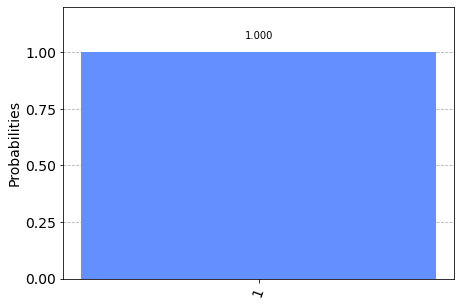

In [18]:
resultsB1 = execute(resultBalanced1, backend=backend, shots=shots).result()
answerB1 = resultsB1.get_counts()

plot_histogram(answerB1)

**Balanced oracle 2**

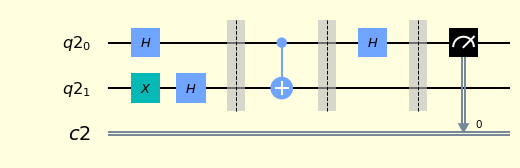

In [19]:
resultBalanced2 = deutsch(oracleBalance1)
resultBalanced2.draw(output='mpl', style=style)

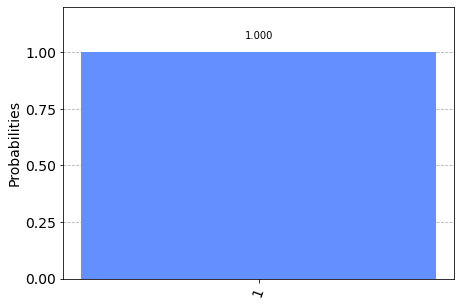

In [20]:
resultsB2 = execute(resultBalanced2, backend=backend, shots=shots).result()
answerB2 = resultsB2.get_counts()

plot_histogram(answerB2)

**Constant oracle 1**

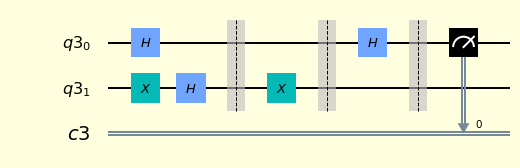

In [21]:
resultConstant1 = deutsch(oracleConstant1)
resultConstant1.draw(output='mpl', style=style) 

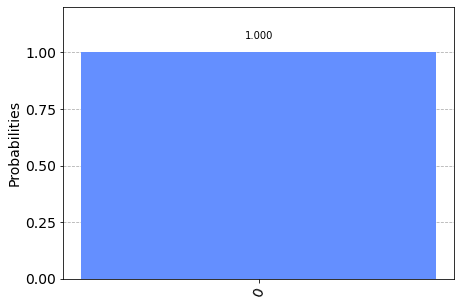

In [22]:
resultsC1= execute(resultConstant1, backend=backend, shots=shots).result()
answerC1 = resultsC1.get_counts()

plot_histogram(answerC1)

**Constant oracle 2**

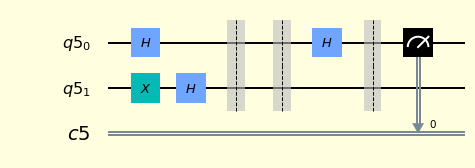

In [24]:
resultConstant2 = deutsch(oracleConstant2)
resultConstant2.draw(output='mpl', style=style) 

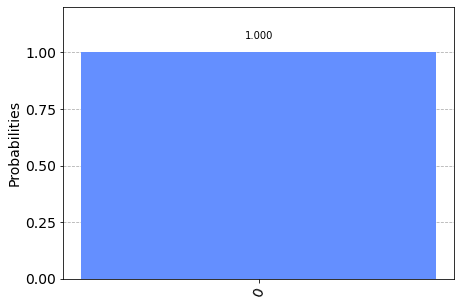

In [25]:
resultsC2= execute(resultConstant2, backend=backend, shots=shots).result()
answerC2 = resultsC2.get_counts()

plot_histogram(answerC2)

### References:

[1] Mermin N.D., Quantum Computer Science: An Introduction, Cambridge University Press, 2007 

[2] Kaye, P. and Kaye, I.Q.C.P. and Laflamme, R. and Mosca, M. and Mosca, I.Q.C.M., An Introduction to Quantum Computing, OUP Oxford, 2007